In [1]:
# Supressing all the warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Data Cleansing and Visualization

In [2]:
# Reading training data
import pandas as pd
train_data = pd.read_csv('train_data.txt', header = None )
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,31,Private,408208,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,Black,Male,0,0,30,United-States,<=50K
2,54,Private,105638,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
3,36,Private,81259,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,36,United-States,<=50K
4,37,Private,201141,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K


*** Since the data does not have header, lets add the column names***

In [3]:
colName = ('Age', 'Workclass', 'Fnlgwt', 'Education', 'Education_Num', 'Marital_Status', 'Occupation', 
           'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours', 'Country', 'Salary')
train_data.columns = colName

In [4]:
train_data.head()

,Age,Workclass,Fnlgwt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours,Country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,31,Private,408208,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,Black,Male,0,0,30,United-States,<=50K
2,54,Private,105638,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
3,36,Private,81259,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,36,United-States,<=50K
4,37,Private,201141,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
train_data.describe()

,Age,Fnlgwt,Education_Num,Capital_Gain,Capital_Loss,Hours
count,32661.000000,3.266100e+04,32661.000000,32661.000000,32661.000000,32661.000000
mean,38.580233,1.898107e+05,10.081381,1075.785371,87.481400,40.447016
std,13.634222,1.056104e+05,2.573046,7374.865205,403.453769,12.350244
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783830e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.372290e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
len(train_data)

32661

In [7]:
train_data.dropna(axis = 0, how = 'any', inplace = True)
len(train_data)

30254

*** The volume of the data is enough for developing a machine learning model  even if we drop the null values. So, lets just drop these values instead of replacing them by other values ***

### 1.1 Feature Engineering

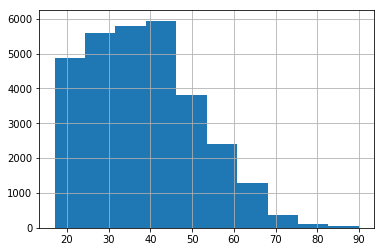

In [8]:
# Age distributuion
import matplotlib.pyplot as plt
train_data.Age.hist()
plt.show()

*** Since this data contains a lot of categorical values and the categories seems to be somehove duplicated in many columns. We will feature engineer each column and try to make the data clean hereafter.***

In [9]:
train_data.Workclass.unique()

array(['State-gov', 'Private', 'Federal-gov', 'Self-emp-inc',
       'Self-emp-not-inc', 'Local-gov', 'Without-pay'], dtype=object)

In [10]:
train_data.loc[train_data['Workclass'].str.endswith('-gov'), 'Workclass'] = 'Gov'
train_data.loc[train_data['Workclass'].str.startswith('Self'), 'Workclass'] = 'Self Emp'
train_data.loc[train_data['Workclass'].str.startswith('Without'), 'Workclass'] = 'Volunteer'

train_data.Workclass.unique()

array(['Gov', 'Private', 'Self Emp', 'Volunteer'], dtype=object)

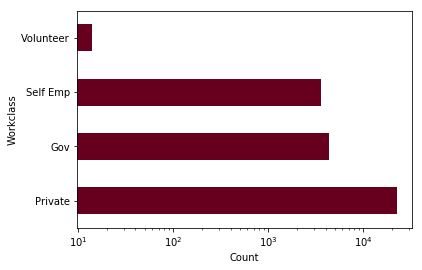

In [11]:
workclass = train_data.groupby('Workclass').count().Age.sort_values(ascending = False)
workclass.plot(kind = 'barh', colormap = 'RdBu', legend = False)
plt.xlabel('Count')
plt.xscale('log')
plt.show()

In [12]:
train_data.Education.unique()

array(['Bachelors', 'HS-grad', '9th', 'Assoc-acdm', 'Prof-school',
       'Some-college', 'Masters', 'Assoc-voc', '11th', '10th', '5th-6th',
       '12th', 'Doctorate', '7th-8th', 'Preschool', '1st-4th'], dtype=object)

In [13]:
train_data.loc[train_data['Education'].str.endswith('th'), 'Education'] = 'Literate'
train_data.loc[train_data['Education'].str.startswith('Preschool'), 'Education'] = 'Literate'
train_data.loc[train_data['Education'].str.startswith('HS-grad'), 'Education'] = 'High School'
train_data.loc[train_data['Education'].str.startswith('Assoc'), 'Education'] = 'Associate'
train_data.loc[train_data['Education'].str.startswith('Prof-school'), 'Education'] = 'Associate'
train_data.loc[train_data['Education'].str.startswith('Some-college'), 'Education'] = 'Some College'

train_data.Education.unique()

array(['Bachelors', 'High School', 'Literate', 'Associate', 'Some College',
       'Masters', 'Doctorate'], dtype=object)

In [14]:
train_data.Sex.unique()

array(['Male', 'Female'], dtype=object)

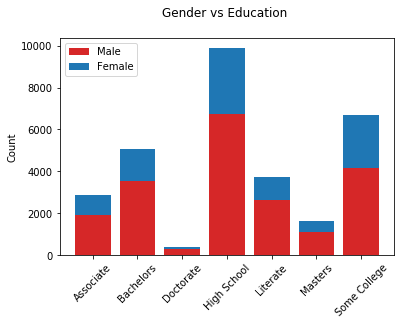

In [15]:
import numpy as np
education = train_data.groupby(['Education', 'Sex']).count().Age.unstack(level = 1).sort()

edList = education.index
ind = np.arange(len(education['Male']))
width = 0.8
plt.bar(ind, education['Male'], width, color = '#d62728', align = 'center')
plt.bar(ind, education['Female'], width, bottom = education['Male'], align = 'center')
plt.ylabel('Count')
plt.title('Gender vs Education \n')
plt.xticks(ind, edList, rotation = 45)
plt.legend(('Male', 'Female'), loc = 2)
# plt.yscale('log')
plt.show()

In [16]:
train_data.Education_Num.unique()

array([13,  9,  5, 12, 15, 10, 14, 11,  7,  6,  3,  8, 16,  4,  1,  2], dtype=int64)

*** Since we already have 'Education' feature, let's drop this feature to avoid redundancy***

In [17]:
train_data.drop('Education_Num', axis=1, inplace=True)

In [18]:
train_data.Marital_Status.unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Widowed', 'Married-AF-spouse'], dtype=object)

In [19]:
train_data.loc[train_data['Marital_Status'].str.startswith('Married'), 'Marital_Status'] = 'Married'
train_data.loc[train_data['Marital_Status'].str.startswith('Never-married'), 'Marital_Status'] = 'Single'
train_data.loc[train_data['Marital_Status'].str.startswith('Separated'), 'Marital_Status'] = 'Divorced'

train_data.Marital_Status.unique()

array(['Single', 'Married', 'Divorced', 'Widowed'], dtype=object)

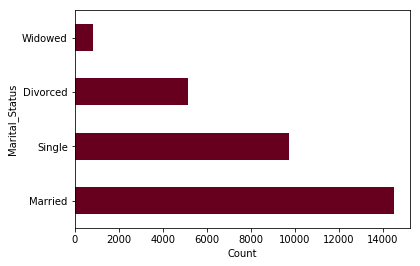

In [20]:
marital = train_data.groupby('Marital_Status').count().Age.sort_values(ascending = False)
marital.plot(kind = 'barh', colormap = 'RdBu', legend = False)
plt.xlabel('Count')
plt.show()

In [21]:
train_data.Occupation.unique()

array(['Adm-clerical', 'Machine-op-inspct', 'Craft-repair',
       'Prof-specialty', 'Armed-Forces', 'Transport-moving',
       'Other-service', 'Exec-managerial', 'Handlers-cleaners',
       'Tech-support', 'Sales', 'Protective-serv', 'Farming-fishing',
       'Priv-house-serv'], dtype=object)

In [22]:
train_data.loc[train_data['Occupation'] == 'Adm-clerical', 'Occupation'] = 'Clerical'
train_data.loc[train_data['Occupation'] == 'Exec-managerial', 'Occupation'] = 'Executive'
train_data.loc[train_data['Occupation'] == 'Handlers-cleaners', 'Occupation'] = 'Clerical'
train_data.loc[train_data['Occupation'] == 'Prof-specialty', 'Occupation'] = 'Professional'
train_data.loc[train_data['Occupation'] == 'Other-service', 'Occupation'] = 'Other'
train_data.loc[train_data['Occupation'] == 'Sales', 'Occupation'] = 'Sales'
train_data.loc[train_data['Occupation'] == 'Transport-moving', 'Occupation'] = 'Transport'
train_data.loc[train_data['Occupation'] == 'Farming-fishing', 'Occupation'] = 'Farming'
train_data.loc[train_data['Occupation'] == 'Machine-op-inspct', 'Occupation'] = 'Mechanical'
train_data.loc[train_data['Occupation'] == 'Tech-support', 'Occupation'] = 'Professional'
train_data.loc[train_data['Occupation'] == 'Craft-repair', 'Occupation'] = 'Mechanical'
train_data.loc[train_data['Occupation'] == 'Protective-serv', 'Occupation'] = 'Protective'
train_data.loc[train_data['Occupation'] == 'Armed-Forces', 'Occupation'] = 'Protective'
train_data.loc[train_data['Occupation'] == 'Priv-house-serv', 'Occupation'] = 'Clerical'

train_data.Occupation.unique()

array(['Clerical', 'Mechanical', 'Professional', 'Protective', 'Transport',
       'Other', 'Executive', 'Sales', 'Farming'], dtype=object)

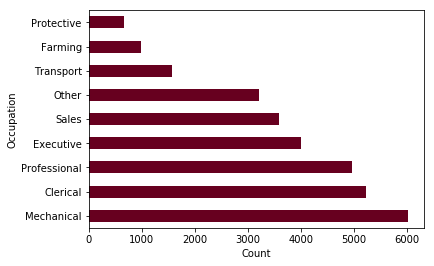

In [23]:
occupation = train_data.groupby('Occupation').count().Age.sort_values(ascending = False)
occupation.plot(kind = 'barh', colormap = 'RdBu', legend = False)
plt.xlabel('Count')
plt.show()

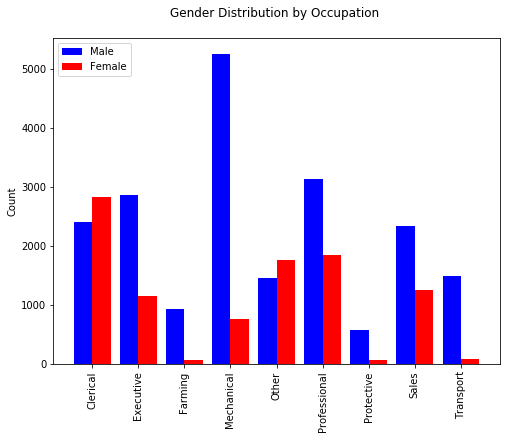

In [24]:
occupation = train_data.groupby(['Occupation', 'Sex']).count().Age.unstack(level = 1)
width = 0.4
ind = np.arange(len(occupation['Male']))
occList = occupation.index
plt.figure(figsize=(8,6))
plt.bar(ind, occupation['Male'], width, color = 'b', align = 'center')
plt.bar(ind + width, occupation['Female'], width, color = 'r', align = 'center')
plt.ylabel('Count')
plt.title('Gender Distribution by Occupation \n')
plt.xticks(ind + width/2, occList, rotation = 90)
plt.legend(('Male', 'Female'), loc = 2)
plt.show()

In [25]:
train_data.Relationship.unique()

array(['Not-in-family', 'Husband', 'Unmarried', 'Own-child', 'Wife',
       'Other-relative'], dtype=object)

In [26]:
train_data.loc[train_data['Relationship'] == 'Not-in-family', 'Relationship'] = 'Not in Family'
train_data.loc[train_data['Relationship'] == 'Own-child', 'Relationship'] = 'Other'
train_data.loc[train_data['Relationship'] == 'Unmarried', 'Relationship'] = 'Other'
train_data.loc[train_data['Relationship'] == 'Other-relative', 'Relationship'] = 'Other'

train_data.Relationship.unique()

array(['Not in Family', 'Husband', 'Other', 'Wife'], dtype=object)

In [27]:
train_data.Race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [28]:
train_data.loc[train_data['Race'] == 'Asian-Pac-Islander', 'Race'] = 'Asian'
train_data.loc[train_data['Race'] == 'Amer-Indian-Eskimo', 'Race'] = 'American Indian'

In [29]:
# Race vs Education
edu_race = train_data.groupby(['Race', 'Education']).count().Age.unstack(level = 1).sort()
edu_race

Education,Associate,Bachelors,Doctorate,High School,Literate,Masters,Some College
Race,,,,,,,
American Indian,25,20,2,116,47,5,71
Asian,97,253,26,194,75,82,171
Black,223,302,8,1064,460,79,691
Other,18,23,1,69,71,5,44
White,2505,4464,339,8426,3099,1461,5718


In [30]:
# Finding the percentage for each race
edu_race = edu_race.div(edu_race.sum(axis = 1), axis = 0).round(2)
edu_race

Education,Associate,Bachelors,Doctorate,High School,Literate,Masters,Some College
Race,,,,,,,
American Indian,0.09,0.07,0.01,0.41,0.16,0.02,0.25
Asian,0.11,0.28,0.03,0.22,0.08,0.09,0.19
Black,0.08,0.11,0.00,0.38,0.16,0.03,0.24
Other,0.08,0.10,0.00,0.30,0.31,0.02,0.19
White,0.10,0.17,0.01,0.32,0.12,0.06,0.22


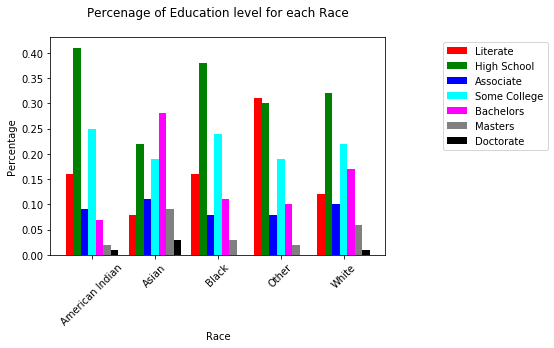

In [31]:
edList = edu_race.index
ind = np.arange(len(edList))
width = 0.12
plt.bar(ind, edu_race['Literate'], width, color = 'red', align = 'center')
plt.bar(ind + width, edu_race['High School'], width, color = 'green', align = 'center')
plt.bar(ind + 2*width, edu_race['Associate'], width, color = 'blue', align = 'center')
plt.bar(ind + 3*width, edu_race['Some College'], width, color = 'cyan', align = 'center')
plt.bar(ind + 4*width, edu_race['Bachelors'], width, color = 'magenta', align = 'center')
plt.bar(ind + 5*width, edu_race['Masters'], width, color = 'grey', align = 'center')
plt.bar(ind + 6*width, edu_race['Doctorate'], width, color = 'black', align = 'center')

plt.xlabel('Race')
plt.ylabel('Percentage')
plt.title('Percenage of Education level for each Race\n')
plt.xticks(ind + 3*width, edList, rotation = 45)
plt.legend(('Literate', 'High School', 'Associate', 'Some College', 'Bachelors', 'Masters', 'Doctorate'), 
           loc = 'upper right', 
           bbox_to_anchor=(1.5,1)
          )
plt.show()

In [32]:
# Race vs Occupation
occ_race = train_data.groupby(['Race', 'Occupation']).count().Age.unstack(level = 1).sort()

# Finding the percentage for each race
occ_race = occ_race.div(occ_race.sum(axis = 1), axis = 0).round(2)
occ_race

Occupation,Clerical,Executive,Farming,Mechanical,Other,Professional,Protective,Sales,Transport
Race,,,,,,,,,
American Indian,0.19,0.10,0.03,0.22,0.12,0.13,0.03,0.09,0.09
Asian,0.18,0.13,0.02,0.15,0.13,0.24,0.02,0.11,0.02
Black,0.24,0.08,0.01,0.18,0.20,0.10,0.04,0.09,0.06
Other,0.16,0.05,0.05,0.28,0.16,0.13,0.02,0.10,0.06
White,0.17,0.14,0.04,0.20,0.10,0.17,0.02,0.12,0.05


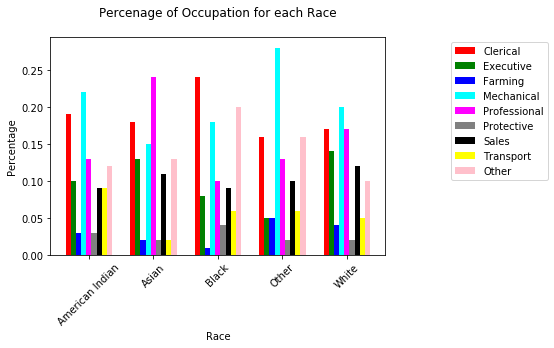

In [33]:
occList = occ_race.index
ind = np.arange(len(edList))
width = 0.08
plt.bar(ind, occ_race['Clerical'], width, color = 'red', align = 'center')
plt.bar(ind + width, occ_race['Executive'], width, color = 'green', align = 'center')
plt.bar(ind + 2*width, occ_race['Farming'], width, color = 'blue', align = 'center')
plt.bar(ind + 3*width, occ_race['Mechanical'], width, color = 'cyan', align = 'center')
plt.bar(ind + 4*width, occ_race['Professional'], width, color = 'magenta', align = 'center')
plt.bar(ind + 5*width, occ_race['Protective'], width, color = 'grey', align = 'center')
plt.bar(ind + 6*width, occ_race['Sales'], width, color = 'black', align = 'center')
plt.bar(ind + 7*width, occ_race['Transport'], width, color = 'yellow', align = 'center')
plt.bar(ind + 8*width, occ_race['Other'], width, color = 'pink', align = 'center')

plt.xlabel('Race')
plt.ylabel('Percentage')
plt.title('Percenage of Occupation for each Race\n')
plt.xticks(ind + 4*width, edList, rotation = 45)
plt.legend(('Clerical', 'Executive', 'Farming', 'Mechanical', 'Professional', 'Protective', 'Sales', 'Transport', 'Other'), 
           loc = 'upper right', 
           bbox_to_anchor=(1.5,1)
          )
plt.show()

In [34]:
train_data.Country.unique()

array(['United-States', 'Poland', 'Mexico', 'Greece', 'Cuba', 'India',
       'Philippines', 'Puerto-Rico', 'Peru', 'Jamaica', 'Honduras',
       'England', 'Canada', 'Germany', 'Iran', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala', 'Italy',
       'China', 'South', 'Japan', 'Yugoslavia',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary'], dtype=object)

In [35]:
train_data.loc[train_data['Country'] == 'United-States', 'Country'] = 'United States'
train_data.loc[train_data['Country'] == 'Puerto-Rico', 'Country'] = 'United States'
train_data.loc[train_data['Country'] == 'Outlying-US(Guam-USVI-etc)', 'Country'] = 'United States'
train_data.loc[train_data['Country'] == 'Trinadad&Tobago', 'Country'] = 'Trinadad & Tobago'
train_data.loc[train_data['Country'] == 'Hong', 'Country'] = 'Hong Kong'
train_data.loc[train_data['Country'] == 'Holand-Netherlands', 'Country'] = 'Netherlands'

train_data.Country.unique()

array(['United States', 'Poland', 'Mexico', 'Greece', 'Cuba', 'India',
       'Philippines', 'Peru', 'Jamaica', 'Honduras', 'England', 'Canada',
       'Germany', 'Iran', 'Columbia', 'Cambodia', 'Thailand', 'Ecuador',
       'Laos', 'Taiwan', 'Haiti', 'Portugal', 'Dominican-Republic',
       'El-Salvador', 'France', 'Guatemala', 'Italy', 'China', 'South',
       'Japan', 'Yugoslavia', 'Scotland', 'Trinadad & Tobago', 'Nicaragua',
       'Vietnam', 'Hong Kong', 'Ireland', 'Hungary'], dtype=object)

In [36]:
# Education in each country
edu_country = train_data.groupby(['Country', 'Education']).count().Age.unstack(level = 1).sort()
edu_country.head()

Education,Associate,Bachelors,Doctorate,High School,Literate,Masters,Some College
Country,,,,,,,
Cambodia,NaN,3.0,NaN,7.0,4.0,NaN,4.0
Canada,9.0,22.0,7.0,28.0,12.0,7.0,22.0
China,1.0,19.0,9.0,16.0,10.0,11.0,2.0
Columbia,11.0,4.0,1.0,18.0,12.0,1.0,9.0
Cuba,8.0,17.0,2.0,23.0,21.0,5.0,17.0


In [37]:
# Since we re going to do a count, let's replace NA by 0
edu_country.fillna(0, inplace = True)
edu_country.head()

Education,Associate,Bachelors,Doctorate,High School,Literate,Masters,Some College
Country,,,,,,,
Cambodia,0.0,3.0,0.0,7.0,4.0,0.0,4.0
Canada,9.0,22.0,7.0,28.0,12.0,7.0,22.0
China,1.0,19.0,9.0,16.0,10.0,11.0,2.0
Columbia,11.0,4.0,1.0,18.0,12.0,1.0,9.0
Cuba,8.0,17.0,2.0,23.0,21.0,5.0,17.0


In [38]:
# Lets see what percentage of people have degree in each country
edu_country['No Degree'] = (edu_country['Associate'] + edu_country['High School'] + 
                              edu_country['Literate'] + edu_country['Some College']
                             )
edu_country['With Degree'] = edu_country['Bachelors'] + edu_country['Masters'] + edu_country['Doctorate']
edu_country = edu_country[['No Degree', 'With Degree']] # selecting only yhe required columns
edu_country.head()

Education,No Degree,With Degree
Country,,
Cambodia,15.0,3.0
Canada,71.0,36.0
China,29.0,39.0
Columbia,50.0,6.0
Cuba,69.0,24.0


In [39]:
# let's convert the number into percentage
edu_country = edu_country.div(edu_country.sum(axis = 1), axis = 0).round(2)
edu_country.head()

Education,No Degree,With Degree
Country,,
Cambodia,0.83,0.17
Canada,0.66,0.34
China,0.43,0.57
Columbia,0.89,0.11
Cuba,0.74,0.26


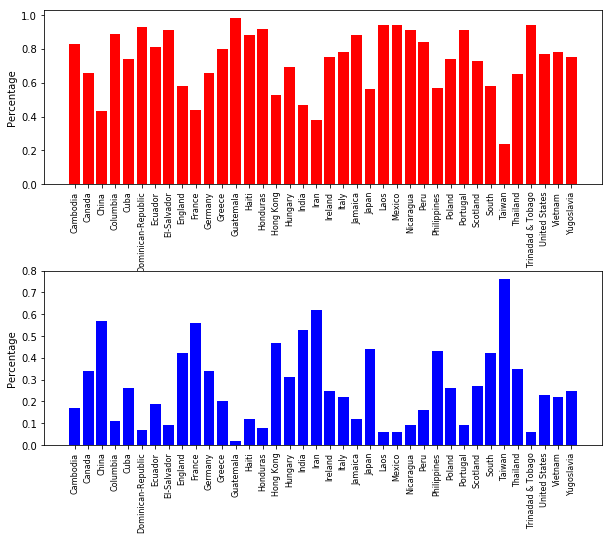

In [40]:
countryList = edu_country.index
ind = np.arange(len(countryList))
width = 0.8
plt.figure(figsize=(10,8))
plt.subplots_adjust(hspace = 0.5)
plt.subplot(2, 1, 1)
plt.bar(ind, edu_country['No Degree'], width, color = 'red', align = 'center')
plt.ylabel('Percentage')
plt.xticks(ind, countryList, rotation = 90, fontsize=8)

plt.subplot(2, 1, 2)
plt.bar(ind, edu_country['With Degree'], width, color = 'blue', align = 'center')
plt.ylabel('Percentage')
plt.xticks(ind, countryList, rotation = 90, fontsize=8)
plt.show()

In [41]:
train_data.Salary.unique()

array(['<=50K', '>50K'], dtype=object)

In [42]:
# Converting the output column('Salary') into a binary class
train_data.loc[train_data['Salary'] == '<=50K', 'Salary'] = 1
train_data.loc[train_data['Salary'] == '>50K', 'Salary'] = 0

train_data.head()

,Age,Workclass,Fnlgwt,Education,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours,Country,Salary
0,39,Gov,77516,Bachelors,Single,Clerical,Not in Family,White,Male,2174,0,40,United States,1
1,31,Private,408208,High School,Single,Mechanical,Not in Family,Black,Male,0,0,30,United States,1
2,54,Private,105638,Literate,Married,Mechanical,Husband,White,Male,0,0,40,United States,1
3,36,Private,81259,Associate,Divorced,Professional,Other,White,Female,0,0,36,United States,1
4,37,Private,201141,High School,Divorced,Mechanical,Other,White,Female,0,0,40,United States,1


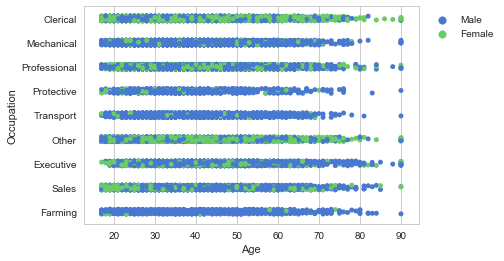

In [43]:
import seaborn as sb
sb.set(style = 'whitegrid', palette = 'muted')

sb.stripplot(data = train_data, x = 'Age', y = 'Occupation', jitter = True, hue = 'Sex')
plt.legend(bbox_to_anchor=(1.25,1))
plt.show()

*** No special pattern between job and age***

# 2. Data Preprocessing

### 2.1 Converting Data into Spark Data Frame
*** We can choose any API for dara preprocessing. I am choosing Spark as its very useful to handle large set of data. The primary reason I am converting the pandas dataframe to Spark dataframe at this point in the code is due to the fact that we are going to need to convert all the categorical values into the numerical values before we feed our data into machine learning models.Spark has very easy steps for that purpose.***

In [44]:
import findspark
findspark.init('C:/Users/ibhat/Spark')

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [45]:
# converting pandas dataframe to spark dataframe
df = spark.createDataFrame(train_data)
df.printSchema()

root
 |-- Age: long (nullable = true)
 |-- Workclass: string (nullable = true)
 |-- Fnlgwt: long (nullable = true)
 |-- Education: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Relationship: string (nullable = true)
 |-- Race: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Capital_Gain: long (nullable = true)
 |-- Capital_Loss: long (nullable = true)
 |-- Hours: long (nullable = true)
 |-- Country: string (nullable = true)
 |-- Salary: long (nullable = true)



### 2.2 Converting Categorical Values into Numerical Values

In [46]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder

# Converting Categorical Values into Numerical Values
WorkClassIndexer = StringIndexer(inputCol = 'Workclass', outputCol = 'WorkClassIndex')
EducationIndexer = StringIndexer(inputCol = 'Education', outputCol = 'EducationIndex')
MaritalIndexer = StringIndexer(inputCol = 'Marital_Status', outputCol = 'MaritalIndex')
OccupationIndexer = StringIndexer(inputCol = 'Occupation', outputCol = 'OccupationIndex')
RelationshipIndexer = StringIndexer(inputCol = 'Relationship', outputCol = 'RelationshipIndex')
RaceIndexer = StringIndexer(inputCol = 'Race', outputCol = 'RaceIndex')
SexIndexer = StringIndexer(inputCol = 'Sex', outputCol = 'SexIndex')
CountryIndexer = StringIndexer(inputCol = 'Country', outputCol = 'CountryIndex')

# Applying OneHotEncoder to avoid dummy variable trap
WorkClassEncoder = OneHotEncoder(inputCol = 'WorkClassIndex', outputCol = 'WorkClassVec')
EducationEncoder = OneHotEncoder(inputCol = 'EducationIndex', outputCol = 'EducationVec')
MaritalEncoder = OneHotEncoder(inputCol = 'MaritalIndex', outputCol = 'MaritalVec')
OccupationsEncoder = OneHotEncoder(inputCol = 'OccupationIndex', outputCol = 'OccupationVec')
RelationshipEncoder = OneHotEncoder(inputCol = 'RelationshipIndex', outputCol = 'RelationshipVec')
RaceEncoder = OneHotEncoder(inputCol = 'RaceIndex', outputCol = 'RaceVec')
# no need to apply OneHotEncoder for 'Sex' feature as this is just a set of binary values after StringIndexer
# SexEncoder = OneHotEncoder(inputCol = 'SexIndex', outputCol = 'SexVec') 
CountryEncoder = OneHotEncoder(inputCol = 'CountryIndex', outputCol = 'CountryVec')

In [47]:
df.columns

['Age',
 'Workclass',
 'Fnlgwt',
 'Education',
 'Marital_Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_Gain',
 'Capital_Loss',
 'Hours',
 'Country',
 'Salary']

*** In Spark MLlib, the model accepts data only in a form of 'features' being an array of all features and label being the dependent variable or simply one of the class in classification problems.***

In [48]:
# Assemble everything together to convert data into ("label","features") format
assembler = VectorAssembler(inputCols = ['Age', 'WorkClassVec', 'Fnlgwt', 'EducationVec', 'MaritalVec', 
                                         'OccupationVec', 'RelationshipVec', 'RaceVec', 'SexIndex', 'Capital_Gain',
                                         'Capital_Loss', 'Hours', 'CountryVec'],
                           outputCol = 'features'
                           )

### 2.3 Feature Scaling

In [49]:
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol = 'features', outputCol = 'scaledFeatures', withStd = True, withMean = False)

### 2.4 Set up the Pipeline

In [50]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[WorkClassIndexer, EducationIndexer, MaritalIndexer, OccupationIndexer, RelationshipIndexer, 
                            RaceIndexer, SexIndexer, CountryIndexer, WorkClassEncoder, EducationEncoder, MaritalEncoder,
                            OccupationsEncoder, RelationshipEncoder, RaceEncoder, CountryEncoder, assembler, scaler])

train_set = pipeline.fit(df).transform(df)

In [51]:
# Selecting only the required columns and renaming the final columns as 'features' and 'label'
from pyspark.sql.functions import *
train_set = train_set.select(col('scaledFeatures').alias('features'), col('Salary').alias('label'))
train_set.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(70,[0,2,4,7,12,1...|    1|
|(70,[0,1,4,5,12,1...|    1|
|(70,[0,1,4,8,11,1...|    1|
|(70,[0,1,4,9,13,1...|    1|
|(70,[0,1,4,5,13,1...|    1|
|(70,[0,1,4,5,12,1...|    1|
|(70,[0,2,4,9,11,2...|    0|
|(70,[0,1,4,6,11,2...|    0|
|(70,[0,1,4,5,12,1...|    1|
|(70,[0,1,4,8,13,1...|    1|
|(70,[0,1,4,6,12,1...|    1|
|(70,[0,1,4,5,11,1...|    1|
|(70,[0,1,4,5,12,1...|    1|
|(70,[0,1,4,5,11,1...|    0|
|(70,[0,1,4,6,12,1...|    1|
|(70,[0,1,4,5,11,1...|    1|
|(70,[0,1,4,6,11,1...|    1|
|(70,[0,1,4,7,11,1...|    0|
|(70,[0,1,4,6,12,1...|    1|
|(70,[0,1,4,5,13,1...|    1|
+--------------------+-----+
only showing top 20 rows



# 3. Test Data Preprocessing

### 3.1 Data Cleansing

In [52]:
# Reading the test data
test_data = pd.read_csv('test_data.txt', header = None )

# Assigning the column name
colName = ('Age', 'Workclass', 'Fnlgwt', 'Education', 'Education_Num', 'Marital_Status', 'Occupation', 
           'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours', 'Country', 'Salary')
test_data.columns = colName

In [53]:
# Dropping the null values
test_data.dropna(axis = 0, how = 'any', inplace = True)

In [54]:
# Data Cleaning for each of columns with categorical values
# I am following the same steps as I did for training data in previous steps
test_data.loc[test_data['Workclass'].str.endswith('-gov'), 'Workclass'] = 'Gov'
test_data.loc[test_data['Workclass'].str.startswith('Self'), 'Workclass'] = 'Self Emp'
test_data.loc[test_data['Workclass'].str.startswith('Without'), 'Workclass'] = 'Volunteer'

test_data.loc[test_data['Education'].str.endswith('th'), 'Education'] = 'Literate'
test_data.loc[test_data['Education'].str.startswith('Preschool'), 'Education'] = 'Literate'
test_data.loc[test_data['Education'].str.startswith('HS-grad'), 'Education'] = 'High School'
test_data.loc[test_data['Education'].str.startswith('Assoc'), 'Education'] = 'Associate'
test_data.loc[test_data['Education'].str.startswith('Prof-school'), 'Education'] = 'Associate'
test_data.loc[test_data['Education'].str.startswith('Some-college'), 'Education'] = 'Some College'

test_data.drop('Education_Num', axis=1, inplace=True)

test_data.loc[test_data['Marital_Status'].str.startswith('Married'), 'Marital_Status'] = 'Married'
test_data.loc[test_data['Marital_Status'].str.startswith('Never-married'), 'Marital_Status'] = 'Single'
test_data.loc[test_data['Marital_Status'].str.startswith('Separated'), 'Marital_Status'] = 'Divorced'

test_data.loc[test_data['Occupation'] == 'Adm-clerical', 'Occupation'] = 'Clerical'
test_data.loc[test_data['Occupation'] == 'Exec-managerial', 'Occupation'] = 'Executive'
test_data.loc[test_data['Occupation'] == 'Handlers-cleaners', 'Occupation'] = 'Clerical'
test_data.loc[test_data['Occupation'] == 'Prof-specialty', 'Occupation'] = 'Professional'
test_data.loc[test_data['Occupation'] == 'Other-service', 'Occupation'] = 'Other'
test_data.loc[test_data['Occupation'] == 'Sales', 'Occupation'] = 'Sales'
test_data.loc[test_data['Occupation'] == 'Transport-moving', 'Occupation'] = 'Transport'
test_data.loc[test_data['Occupation'] == 'Farming-fishing', 'Occupation'] = 'Farming'
test_data.loc[test_data['Occupation'] == 'Machine-op-inspct', 'Occupation'] = 'Mechanical'
test_data.loc[test_data['Occupation'] == 'Tech-support', 'Occupation'] = 'Professional'
test_data.loc[test_data['Occupation'] == 'Craft-repair', 'Occupation'] = 'Mechanical'
test_data.loc[test_data['Occupation'] == 'Protective-serv', 'Occupation'] = 'Protective'
test_data.loc[test_data['Occupation'] == 'Armed-Forces', 'Occupation'] = 'Protective'
test_data.loc[test_data['Occupation'] == 'Priv-house-serv', 'Occupation'] = 'Clerical'

test_data.loc[test_data['Relationship'] == 'Not-in-family', 'Relationship'] = 'Not in Family'
test_data.loc[test_data['Relationship'] == 'Own-child', 'Relationship'] = 'Other'
test_data.loc[test_data['Relationship'] == 'Unmarried', 'Relationship'] = 'Other'
test_data.loc[test_data['Relationship'] == 'Other-relative', 'Relationship'] = 'Other'

test_data.loc[test_data['Race'] == 'Asian-Pac-Islander', 'Race'] = 'Asian'
test_data.loc[test_data['Race'] == 'Amer-Indian-Eskimo', 'Race'] = 'American Indian'

test_data.loc[test_data['Country'] == 'United-States', 'Country'] = 'United States'
test_data.loc[test_data['Country'] == 'Puerto-Rico', 'Country'] = 'United States'
test_data.loc[test_data['Country'] == 'Outlying-US(Guam-USVI-etc)', 'Country'] = 'United States'
test_data.loc[test_data['Country'] == 'Trinadad&Tobago', 'Country'] = 'Trinadad & Tobago'
test_data.loc[test_data['Country'] == 'Hong', 'Country'] = 'Hong Kong'
test_data.loc[test_data['Country'] == 'Holand-Netherlands', 'Country'] = 'Netherlands'

test_data.loc[test_data['Salary'] == '<=50K', 'Salary'] = 1
test_data.loc[test_data['Salary'] == '>50K', 'Salary'] = 0

In [55]:
# Converting test data into spark dataframe
test_df = spark.createDataFrame(test_data)

final_test_data = pipeline.fit(test_df).transform(test_df)

### 3.2 Splitting into Test and Validation Set
*** I will be using a part of test data for validating our model and the rest as untouched data for deploying our model. So let's break the total test data into two halves one for test and another for validation purpose. ***

In [56]:
validation_set, test_set = final_test_data.randomSplit([0.5, 0.5])
validation_set = validation_set.select(col('scaledFeatures').alias('features'), col('Salary').cast('double').alias('label'))

# 4. Developing Machine Learning Model

*** Let's start with a simple logistic regression ***

### 4.1 Model Selection

In [57]:
from pyspark.ml.classification  import LogisticRegression
lr = LogisticRegression(maxIter=10,  featuresCol='features', labelCol='label')

### 4.2 Hyperparameter Selection

In [58]:
from pyspark.ml.tuning import ParamGridBuilder

# Constructing a grid of parameters to search over
paramGrid = (ParamGridBuilder()    
             .addGrid(lr.regParam, [0.1, 0.01])    
             .addGrid(lr.fitIntercept, [False, True])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .build()
            )

### 4.3 K-fold Cross Validation

In [59]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator
# 5-fold cross-validation
crossval = CrossValidator(estimator = lr,
                          estimatorParamMaps = paramGrid,
                          evaluator = MulticlassClassificationEvaluator(),
                          numFolds = 5)  

### 4.4 Training the Model

In [60]:
lrModel = crossval.fit(train_set)

### 4.5 Model Evaluation

In [61]:
results = lrModel.transform(validation_set)
results.select('prediction', 'label').show()

+----------+-----+
|prediction|label|
+----------+-----+
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
+----------+-----+
only showing top 20 rows



In [62]:
# Model evaluation is still in RDD phase. So We will use rdd here instead of spark dataframe. 
from pyspark.mllib.evaluation import MulticlassMetrics

predictionAndLabels = results.select('prediction', 'label').rdd

In [63]:
metrics = MulticlassMetrics(predictionAndLabels)

print('Confusion Matrix')
print(metrics.confusionMatrix().toArray())
print('Accuracy: %.2f'%metrics.accuracy)
print('Precision: %.2f'%metrics.weightedPrecision)

Confusion Matrix
[[ 1049.   829.]
 [  390.  5315.]]
Accuracy: 0.84
Precision: 0.83


# 5. Extension to Multiple Classifiers

### 5.1 Defining the Models

In [64]:
from pyspark.ml.classification  import LogisticRegression, RandomForestClassifier, GBTClassifier, NaiveBayes
#, LinearSVC

lr = LogisticRegression(maxIter=10,  featuresCol='features', labelCol='label')
rcf = RandomForestClassifier(maxDepth = 10)
gbt = GBTClassifier(maxDepth = 10)
nb = NaiveBayes()
# svc = LinearSVC()

### 5.2 Hyper-parameter Selection

In [65]:
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator
from pyspark.mllib.evaluation import MulticlassMetrics

lrGrid = (ParamGridBuilder()    
             .addGrid(lr.regParam, [0.1, 0.01])    
             .addGrid(lr.fitIntercept, [False, True])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .build()
            )

rcfGrid = (ParamGridBuilder()
             .addGrid(rcf.numTrees, [20, 50, 100])
             .addGrid(rcf.featureSubsetStrategy, ['auto', 'sqrt'])
             .addGrid(rcf.minInfoGain, [0.01, 0.001])
             .build()
            )

gbtGrid = (ParamGridBuilder()
             .addGrid(gbt.lossType, ['logistic'])
             .build()
            )

nbGrid = (ParamGridBuilder()
             .addGrid(nb.modelType, ['multinomial'])
             .build()
            )

### 5.3 Cross Validation, Training, and Model Evaluation 
*** Here we will apply the each steps we followed in section 4 for each of the models we defined in section 5.1***

In [66]:
index = ('Logistic Regression', 'Random Forst Classifier', 'Gadient Boost', 'Naive Bayes')
columns = ['Accuracy', 'Precision', 'True Positive Rate','False Positive Rate']
performance = pd.DataFrame(index = index, columns = columns)

In [67]:
for clf, grid, name in zip([lr, rcf, gbt, nb], 
                           [lrGrid, rcfGrid, gbtGrid, nbGrid], 
                           ['Logistic Regression', 'Random Forst Classifier', 'Gadient Boost', 'Naive Bayes']):
    crossval = CrossValidator(estimator = clf,
                             estimatorParamMaps = grid,
                             evaluator = MulticlassClassificationEvaluator(),
                             numFolds = 2)
    # restricted to numFolds = 2 because of computational capacity. I would use 5-10 fold validation for real time jobs.
    model = crossval.fit(train_set)
    result  = model.transform(validation_set)
    pred = result.select('prediction', 'label').rdd
    metrcis = MulticlassMetrics(pred)
    performance.loc[name, 'Accuracy'] = '%.2f'%metrics.accuracy
    performance.loc[name, 'Precision'] = '%.2f'%metrics.weightedPrecision
    performance.loc[name, 'True Positive Rate'] = '%.2f'%metrics.weightedTruePositiveRate
    performance.loc[name, 'False Positive Rate'] = '%.2f'%metrics.weightedFalsePositiveRate   
    
print(performance)    

                        Accuracy Precision True Positive Rate  \
Logistic Regression         0.84      0.83               0.84   
Random Forst Classifier     0.84      0.83               0.84   
Gadient Boost               0.84      0.83               0.84   
Naive Bayes                 0.84      0.83               0.84   

                        False Positive Rate  
Logistic Regression                    0.35  
Random Forst Classifier                0.35  
Gadient Boost                          0.35  
Naive Bayes                            0.35  


*** Here, all the models we considered with optimized hyperparameters give us the same accuracy. So let's just use the simple model - Logistic Regression from section 4.4- to deploy our model in the test set***

# 6. Deploying the Best Model

In [68]:
# Dropping the label(Salary) from the test set to make prediction
test_set = test_set.drop('Salary')
# Applying the model to the test data
final_result  = lrModel.transform(test_set)

In [69]:
# Priting the final result with original features
final_result.select('Age', 'Workclass', 'Fnlgwt', 'Education', 'Marital_Status', 'Occupation', 'Relationship',
                    'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours', 'Country', 'prediction').show()

+---+---------+------+------------+--------------+------------+-------------+-----+------+------------+------------+-----+-------------+----------+
|Age|Workclass|Fnlgwt|   Education|Marital_Status|  Occupation| Relationship| Race|   Sex|Capital_Gain|Capital_Loss|Hours|      Country|prediction|
+---+---------+------+------------+--------------+------------+-------------+-----+------+------------+------------+-----+-------------+----------+
| 17|  Private| 28544|    Literate|        Single|       Sales|Not in Family|White|Female|           0|           0|   20|United States|       0.0|
| 17|  Private| 81010|    Literate|        Single|       Sales|        Other|White|Female|           0|           0|   20|United States|       0.0|
| 17|  Private|269430|    Literate|        Single|  Mechanical|Not in Family|White|  Male|           0|           0|   40|United States|       0.0|
| 18|  Private| 42857|Some College|        Single|       Sales|        Other|White|Female|           0|         